## Table of Contents
- [Data Exploration and Wrangling](#explore)
- [Inferential Statistics and Results](#statistics)
- [Summary](#summary)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import f_oneway, shapiro, levene

import pingouin as pg
import pycountry

%matplotlib inline

C:\Users\MR. NSIKAN\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id='explore'></a>
### Data Exploration

In [2]:
# Load data into a dataframe
df = pd.read_csv('SYB66_246_202310_Population Growth, Fertility and Mortality Indicators.csv', encoding= 'ANSI', header= 1)
df.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.3,NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",37.1,NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",254,NaN,"World Health Organization (WHO), the United Na..."
4,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),70.1,NaN,"United Nations Population Division, New York, ..."


In [3]:
# Rename columns
df.rename(columns= {
    'Unnamed: 1':'Country/Area',
    'Region/Country/Area': 'Region'
}, inplace= True)

In [4]:
# Inspect the effected changes
df.head(2)

,Region,Country/Area,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.3,NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,NaN,"United Nations Population Division, New York, ..."


In [5]:
# Check the number of unique values in each column
df.nunique()

Region           268
Country/Area     268
Year               4
Series             7
Value           1076
Footnotes         81
Source             4
dtype: int64

In [6]:
df.Year.unique()

array([2010, 2015, 2020, 2022], dtype=int64)

In [7]:
# Inspect data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6756 entries, 0 to 6755
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Region        6756 non-null   int64 
 1   Country/Area  6756 non-null   object
 2   Year          6756 non-null   int64 
 3   Series        6756 non-null   object
 4   Value         6756 non-null   object
 5   Footnotes     2526 non-null   object
 6   Source        6756 non-null   object
dtypes: int64(2), object(5)
memory usage: 369.6+ KB


#### `Value` should be float

In [8]:
# Change Value dtype to float
df.Value = df.Value.str.replace(',', '').astype(float)

In [9]:
# Unique Source values
df.Source.unique()

array(['United Nations Population Division, New York, World Population Prospects: The 2022 Revision, last accessed July 2022.',
       'United Nations Population Division, New York, World Population Prospects: The 2022 Revision; supplemented by data from the United Nations Statistics Division, New York, Demographic Yearbook 2021 and Secretariat for the Pacific Community (SPC) for small countries or areas, last accessed July 2022.',
       'United Nations Statistics Division, New York, "Demographic Yearbook 2021" and the demographic statistics database, last accessed June 2022.',
       'World Health Organization (WHO), the United Nations Children\'s Fund (UNICEF), the United Nations Population Fund (UNFPA), the World Bank and the United Nations Population Division, "Trends in Maternal Mortality 2000 - 2020."'],
      dtype=object)

In [10]:
# Unique countries, areas, and regions in the dataset
df['Country/Area'].unique()

array(['Total, all countries or areas', 'Africa', 'Northern Africa',
       'Sub-Saharan Africa', 'Eastern Africa', 'Middle Africa',
       'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Latin America & the Caribbean', 'Caribbean',
       'Central America', 'South America', 'Asia', 'Central Asia',
       'Eastern Asia', 'South-central Asia', 'South-eastern Asia',
       'Southern Asia', 'Western Asia', 'Europe', 'Eastern Europe',
       'Northern Europe', 'Southern Europe', 'Western Europe', 'Oceania',
       'Australia and New Zealand', 'Melanesia', 'Micronesia',
       'Polynesia', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurin. State of)', 'Bonaire, St. Eustatiu

In [11]:
# Extract real country names from Country/Area
country_ls = []
for country in df['Country/Area']:
    try:
        country_ls.append(pycountry.countries.lookup(country).name)
    except Exception:
        continue
# Extract unique country names
country_ls = list(set(country_ls))

In [12]:
# Create a new df containing only real countries
new_df = df[df['Country/Area'].isin(country_ls)]

In [13]:
new_df.head()

,Region,Country/Area,Year,Series,Value,Footnotes,Source
813,4,Afghanistan,2010,Population annual rate of increase (percent),2.7,NaN,"United Nations Population Division, New York, ..."
814,4,Afghanistan,2010,Total fertility rate (children per women),6.1,NaN,"United Nations Population Division, New York, ..."
815,4,Afghanistan,2010,"Infant mortality for both sexes (per 1,000 liv...",64.8,NaN,"United Nations Statistics Division, New York, ..."
816,4,Afghanistan,2010,"Maternal mortality ratio (deaths per 100,000 p...",899.0,NaN,"World Health Organization (WHO), the United Na..."
817,4,Afghanistan,2010,Life expectancy at birth for both sexes (years),60.9,NaN,"United Nations Population Division, New York, ..."


In [14]:
# Rename Country/Area with Country
new_df = new_df.copy()
new_df.rename(columns={'Country/Area': 'Country'}, inplace= True)

In [15]:
# Check info of new df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5283 entries, 813 to 6674
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Region     5283 non-null   int64  
 1   Country    5283 non-null   object 
 2   Year       5283 non-null   int64  
 3   Series     5283 non-null   object 
 4   Value      5283 non-null   float64
 5   Footnotes  1854 non-null   object 
 6   Source     5283 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 330.2+ KB


<a id='statistics'></a>
### Inferential Statistics and Results

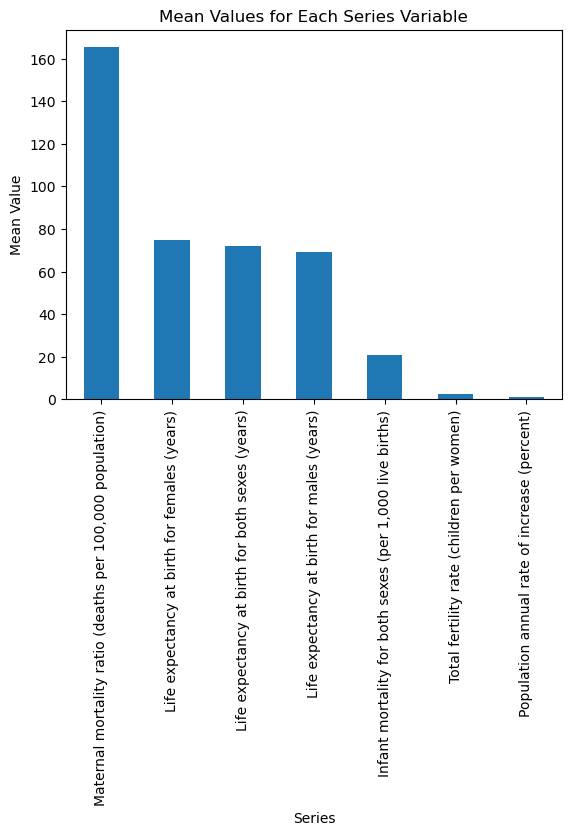

In [16]:
# Check mean values of each Series variable in Series
series_var_meanvals = new_df.groupby(['Series'])['Value'].mean().sort_values(ascending = False)

# Plot a barchart
series_var_meanvals.plot(kind = 'bar');
plt.xlabel('Series');
plt.ylabel('Mean Value');
plt.title('Mean Values for Each Series Variable');
plt.savefig('pic_1.png', bbox_inches = 'tight')

In [17]:
# Subset the data using Series to only contain Maternal mortality ratio (deaths per 100,000 population)
# and Infant mortality for both sexes (per 1,000 live births)
maternal_mortality = new_df[new_df.Series == 'Maternal mortality ratio (deaths per 100,000 population)']
infant_mortality = new_df[new_df.Series == 'Infant mortality for both sexes (per 1,000 live births)']

In [18]:
# Check normalty of distribution for maternal mortality
shapiro(maternal_mortality.Value)

ShapiroResult(statistic=0.6973698139190674, pvalue=3.575271973709606e-29)

In [19]:
# Check normalty of distribution for infant mortality
shapiro(infant_mortality.Value)

ShapiroResult(statistic=0.8235345482826233, pvalue=1.0948036639422955e-28)

With p-values for both Infant mortality and maternal mortality less than 0.05, we reject the null hypothesis that the data is normally distributed.

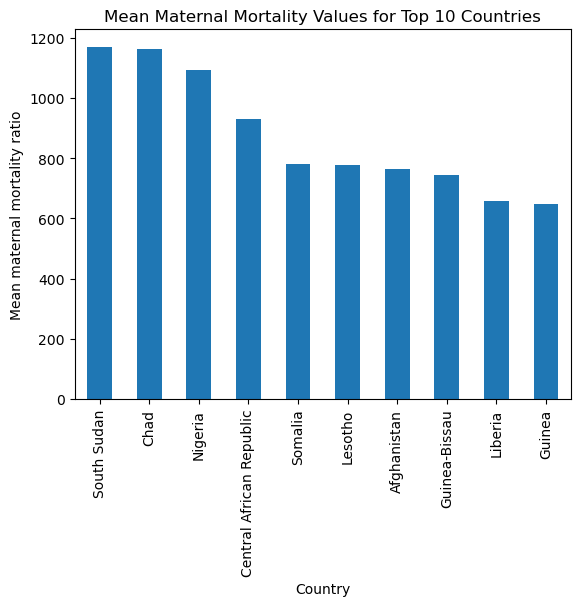

In [20]:
# Check mean Maternal Mortality Values for Top 10 Countries

# Get top 10 maternal mortality countries
top_10_mat_mor = maternal_mortality.groupby('Country')['Value'].mean().sort_values(ascending = False)[:10]

# Plot a barchart
top_10_mat_mor.plot(kind = 'bar');
plt.xlabel('Country');
plt.ylabel('Mean maternal mortality ratio');
plt.title('Mean Maternal Mortality Values for Top 10 Countries');
plt.savefig('pic_2.png', bbox_inches = 'tight')

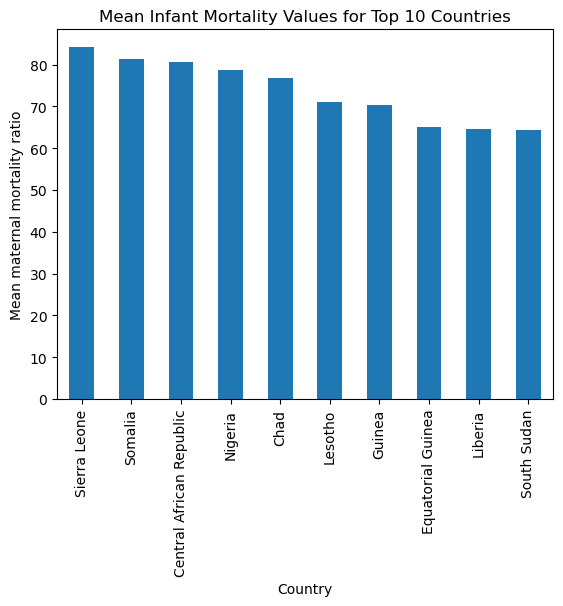

In [21]:
# Check mean infant mortality values for top 10 countries

# Get top 10 maternal mortality countries
top_10_inf_mor = infant_mortality.groupby('Country')['Value'].mean().sort_values(ascending = False)[:10]

# Plot a barchart
top_10_inf_mor.plot(kind = 'bar');
plt.xlabel('Country');
plt.ylabel('Mean maternal mortality ratio');
plt.title('Mean Infant Mortality Values for Top 10 Countries');
plt.savefig('pic_3.png', bbox_inches = 'tight')

In [22]:
# List of top 5 mortality coutries
top_5_mat_mortality = ['South Sudan', 
                       'Chad', 
                       'Nigeria', 
                       'Central African Republic', 
                       'Somalia'
                      ]

top_5_inf_mortality = ['Sierra Leone', 
                       'Chad', 
                       'Nigeria', 
                       'Central African Republic',
                       'Somalia'
                      ]

# Create dfs containing the top 5 mortality countries
df_mat_mortality = maternal_mortality[maternal_mortality['Country'].isin(top_5_mat_mortality)]
df_inf_mortality = infant_mortality[infant_mortality['Country'].isin(top_5_inf_mortality)]

In [23]:
# Values for each top 5 maternal mortality country
s_sudan_mat_mortality = new_df[(new_df.Series =='Maternal mortality ratio (deaths per 100,000 population)')\
                               & (new_df['Country'] == 'South Sudan') ].Value
chad_mat_mortality = new_df[(new_df.Series =='Maternal mortality ratio (deaths per 100,000 population)')\
                               & (new_df['Country'] == 'Chad') ].Value
nigeria_mat_mortality = new_df[(new_df.Series =='Maternal mortality ratio (deaths per 100,000 population)')\
                               & (new_df['Country'] == 'Nigeria') ].Value
caf_mat_mortality = new_df[(new_df.Series =='Maternal mortality ratio (deaths per 100,000 population)')\
                               & (new_df['Country'] == 'Central African Republic') ].Value
somalia_mat_mortality = new_df[(new_df.Series =='Maternal mortality ratio (deaths per 100,000 population)')\
                               & (new_df['Country'] == 'Somalia') ].Value

In [24]:
# Values for each top 5 infant mortality country
sierra_leone_inf_mortality = new_df[(new_df.Series =='Infant mortality for both sexes (per 1,000 live births)')\
                               & (new_df['Country'] == 'Sierra Leone') ].Value
chad_inf_mortality = new_df[(new_df.Series =='Infant mortality for both sexes (per 1,000 live births)')\
                               & (new_df['Country'] == 'Chad') ].Value
nigeria_inf_mortality = new_df[(new_df.Series =='Infant mortality for both sexes (per 1,000 live births)')\
                               & (new_df['Country'] == 'Nigeria') ].Value
caf_inf_mortality = new_df[(new_df.Series =='Infant mortality for both sexes (per 1,000 live births)')\
                               & (new_df['Country'] == 'Central African Republic') ].Value
somalia_inf_mortality = new_df[(new_df.Series =='Infant mortality for both sexes (per 1,000 live births)')\
                               & (new_df['Country'] == 'Somalia') ].Value

In [25]:
# Check similarity in maternal mortality variance for top 5 countries
print(levene(s_sudan_mat_mortality, 
             chad_mat_mortality, 
             nigeria_mat_mortality, 
             caf_mat_mortality, 
             somalia_mat_mortality
            )
     )

# Check similarity in infant mortality variance for top 5 countries
print(levene(chad_inf_mortality, 
             sierra_leone_inf_mortality, 
             nigeria_inf_mortality, 
             caf_inf_mortality, 
             somalia_inf_mortality
            )
     )

LeveneResult(statistic=0.4697702005843023, pvalue=0.7571153185971469)
LeveneResult(statistic=0.7436877542432324, pvalue=0.5770287319557599)


With p-values for top 5 Infant mortality and maternal mortality countries greater than 0.05, we fail to reject the null hypothesis that each group has the same variance.

In [26]:
# Check for difference between group means
t1, pval1 = f_oneway(s_sudan_mat_mortality, 
                     chad_mat_mortality, 
                     nigeria_mat_mortality, 
                     caf_mat_mortality, 
                     somalia_mat_mortality)
pval1

0.008841312395907196

With p-value < 0.05, we cannot fail to reject the null hypothesis that there is no difference in population means between each group in the top five maternal mortality countries.

In [27]:
# Check for difference between group means
t2, pval2 = f_oneway(sierra_leone_inf_mortality,
                     chad_inf_mortality, 
                     nigeria_inf_mortality, 
                     caf_inf_mortality,
                     somalia_inf_mortality)
pval2

0.9429865161095413

With p-value > 0.05, we fail to reject the null hypothesis that there is no difference in population mean between each group in the top five infant mortality countries.

In [28]:
# Check if the difference in means is actual or due to multiple tests
pg.pairwise_tests(
    dv = 'Value', 
    between = 'Country', 
    data = df_mat_mortality, 
    padjust = 'holm'
)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Country,Central African Republic,Chad,False,True,-2.411349,4.0,two-sided,0.073447,0.440684,holm,1.618,-1.575087
1,Country,Central African Republic,Nigeria,False,True,-2.387054,4.0,two-sided,0.075409,0.440684,holm,1.595,-1.559217
2,Country,Central African Republic,Somalia,False,True,1.274647,4.0,two-sided,0.271445,1.000000,holm,0.842,0.832596
3,Country,Central African Republic,South Sudan,False,True,-2.827579,4.0,two-sided,0.047461,0.332230,holm,2.052,-1.846967
4,Country,Chad,Nigeria,False,True,0.914960,4.0,two-sided,0.411979,1.000000,holm,0.705,0.597649
5,Country,Chad,Somalia,False,True,3.116156,4.0,two-sided,0.035659,0.320930,holm,2.407,2.035465
6,Country,Chad,South Sudan,False,True,-0.062721,4.0,two-sided,0.952998,1.000000,holm,0.563,-0.040969
7,Country,Nigeria,Somalia,False,True,3.062679,4.0,two-sided,0.037560,0.320930,holm,2.338,2.000533
8,Country,Nigeria,South Sudan,False,True,-1.257494,4.0,two-sided,0.276986,1.000000,holm,0.834,-0.821391
9,Country,Somalia,South Sudan,False,True,-3.420840,4.0,two-sided,0.026760,0.267595,holm,2.835,-2.234483


From `p-unc` values, we can see that mean difference occured between Central African Republic vs South Sudan, Chad vs Somalia, Nigeria vs Somalia, and Somalia vs South Sudan. This happened due to multiple test. The `p_corr` gives the corrected/adjusted p_values and we can see that actually, there is no mean difference between the top 5 maternal mortality countries.

<a id='summary'></a>
### Summary

In this project, I investigated top 5 martenal mortality and top 5 infant mortality countries by mean to draw inferences if there is actually any difference between them. The following are my findings
1. Each country in the dataset has equal observation (27)<br>
2. Based on average, South Sudan, Chad, Nigeria, Central African Republic, Somalia are top 5 maternal mortality countries. South Sudan tops the chart with average maternal mortality rate of about 1170 between year 2010 to 2022. Somalis has the least in this group with about 782 deaths.<br>
3. Based on average, Sierra Leone, Chad, Nigeria, Central African Republic, and Somalia are top 5 infant mortality countries. Sierra Leone tops this group with average deaths of about 84 during the same time frame. Chad has the least with about 77 deaths.<br>
4. Statistically, there is actually no difference in mortality rate between these countries. This means that on average, both infant mortality rate and maternal mortality rate between the respective top 5 countries are the same.